In [1]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pypde

In [2]:
# Number of spatial dimensions: n; this will be 1 since we are working on 1-dimensional space (x variable).
n = 1

# Defining constants...
gamma = 1.4 # Heat capacity ratio

# Speed of sound
@njit
def a(p, rho):
    return np.sqrt(gamma*(p/rho))

# We define the source term, S(Q), as a null tensor (tensor of zeroes) with a size equal to (n_variables,).
# (Q is the vector analog to U from the PDF cheatsheet; it corresponds to the vector of independent variables).
def S(Q):
    return np.zeros(3)

# The F term will also be zero of size (n_variables,).
def F(Q):
    return np.zeros(3)

In [3]:
# Now, we need to define the matrix A of the system of hyperbolic DE, which are the non-conservative terms.
# We will only have one matrix A, of size (n_var, n_var).

def A(Q):
    # Variables from Q (analog to the U from the PDF cheatsheet).
    rho = Q[0]
    p = Q[1]
    u = Q[2]
    
    # We define the output matrix (array) from this function.
    A_ = np.array([[u, rho, 0], [0, u, 1/rho], [0, rho*a(p = p, rho = rho)*a(p = p, rho = rho), u]])
    
    return A_

In [4]:
# At this point it is necessary to define the initial values (for t = 0) for the variables we have: rho, p and u. This will be computed in what we define as Q0.
# This Q0 will be an array of size (nx, n_var), where nx is the number of cells in which we discretize the spatial dimension, with a domain length (L or Lx) of 1.
# The test is run to a final time of 0.2, i.e. tf = 0.5.

nx = 400
L = [1.]
tf = 0.2

rho_init_L = 1
p_init_L = 1
u_init_L = 0.9

rho_init_R = 1
p_init_R = 10
u_init_R = 0

QL = np.array([rho_init_L, p_init_L, u_init_L])
QR = np.array([rho_init_R, p_init_R, u_init_R])

Q0 = np.zeros([nx,3])
for i in range(nx):
    if i/nx < 0.5:
        Q0[i] = QL
    else:
        Q0[i] = QR

In [5]:
# We solve:

out = pypde.pde_solver(Q0 = Q0, tf = tf, L = L, F = F, B = A, S = S, ndt = 400, flux = "roe", order = 3)

compiling functions...
Using 11 threads
t = 0.000120268
t = 0.00019494
t = 0.000265385
t = 0.000334037
t = 0.000402036
t = 0.000465293
t = 0.000750858
t = 0.000967515
t = 0.00113732
t = 0.00131191
t = 0.00151417
t = 0.00179264
t = 0.00201601
t = 0.00233327
t = 0.00258988
t = 0.00287673
t = 0.00311599
t = 0.00338496
t = 0.00362932
t = 0.00389488
t = 0.00414075
t = 0.00440076
t = 0.00464768
t = 0.00489712
t = 0.00514438
t = 0.00539343
t = 0.00564481
t = 0.00589795
t = 0.00615178
t = 0.00640559
t = 0.00665889
t = 0.00691117
t = 0.00716226
t = 0.00741235
t = 0.00766153
t = 0.00790988
t = 0.00815752
t = 0.0084045
t = 0.00865093
t = 0.00889658
t = 0.00914075
t = 0.00938352
t = 0.00962497
t = 0.00986521
t = 0.0101043
t = 0.0103424
t = 0.0105794
t = 0.0108156
t = 0.0110507
t = 0.011285
t = 0.0115184
t = 0.011751
t = 0.0119827
t = 0.0122137
t = 0.0124439
t = 0.0126734
t = 0.0129023
t = 0.0131305
t = 0.0133582
t = 0.0135853
t = 0.0138118
t = 0.0140379
t = 0.0142635
t = 0.0144888
t = 0.0147138
t 

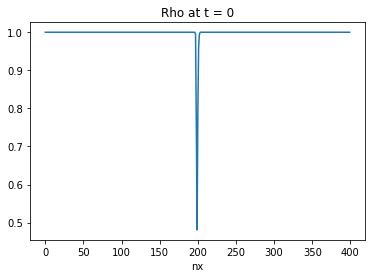

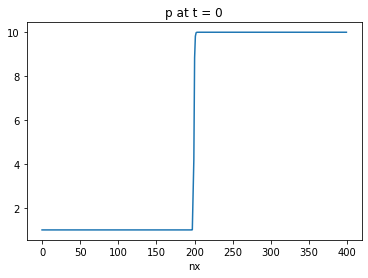

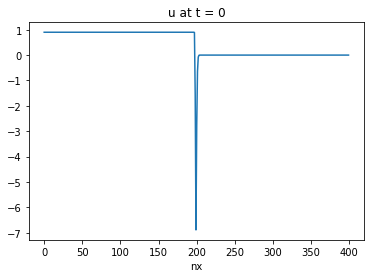

In [6]:
# Solutions at t = 0:

plt.plot(out[0, :, 0])
plt.title("Rho at t = 0")
plt.xlabel("nx")
plt.show()

plt.plot(out[0, :, 1])
plt.title("p at t = 0")
plt.xlabel("nx")
plt.show()

plt.plot(out[0, :, 2])
plt.title("u at t = 0")
plt.xlabel("nx")
plt.show()

In [7]:
np.where(out[:,:,2] < 0)

(array([  0,   0,   0, ..., 399, 399, 399]),
 array([198, 199, 200, ..., 291, 292, 293]))

In [8]:
tf

0.2

In [9]:
x = np.linspace(0, 1, nx)
t = np.linspace(0, 0.2, 400)

X, T = np.meshgrid(x, t)

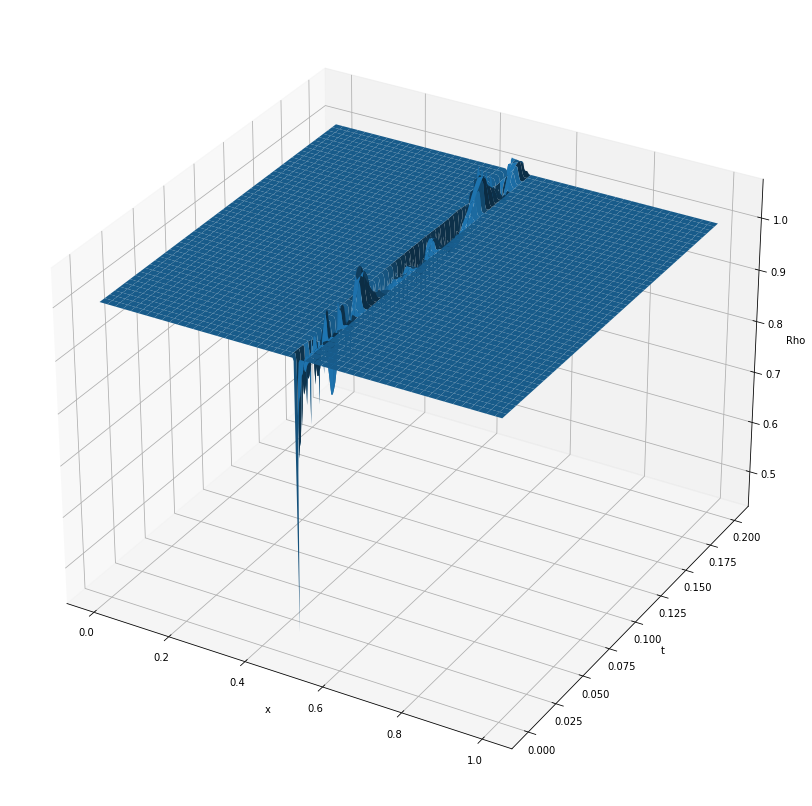

In [10]:
fig = plt.figure()
fig.set_size_inches(19, 11)
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)
ax.plot_surface(X, T, out[:,:,0])
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("Rho")
plt.show()

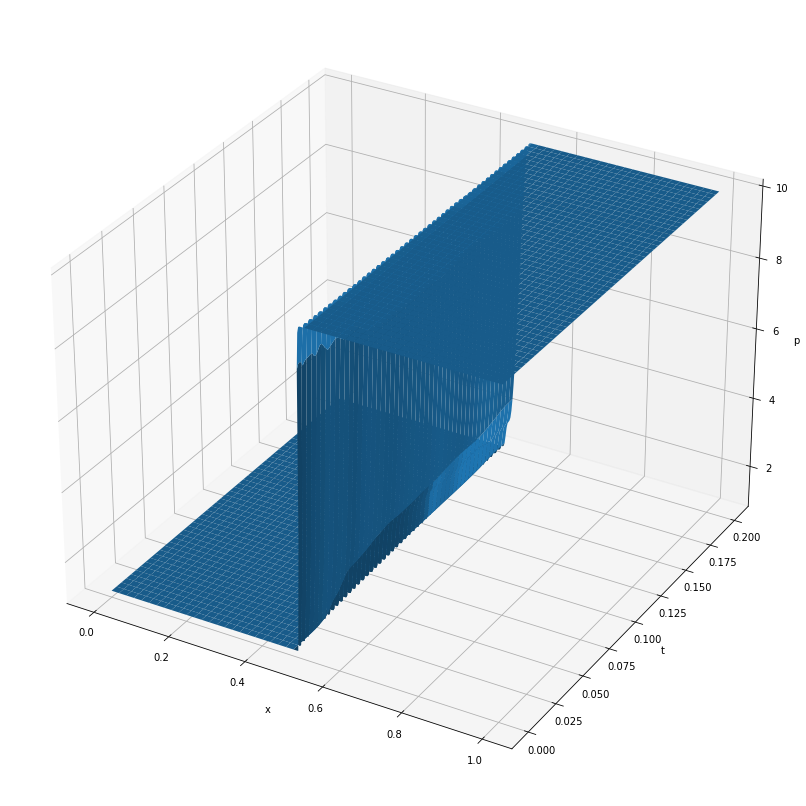

In [11]:
fig = plt.figure()
fig.set_size_inches(19, 11)
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)
ax.plot_surface(X, T, out[:,:,1])
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("p")
plt.show()

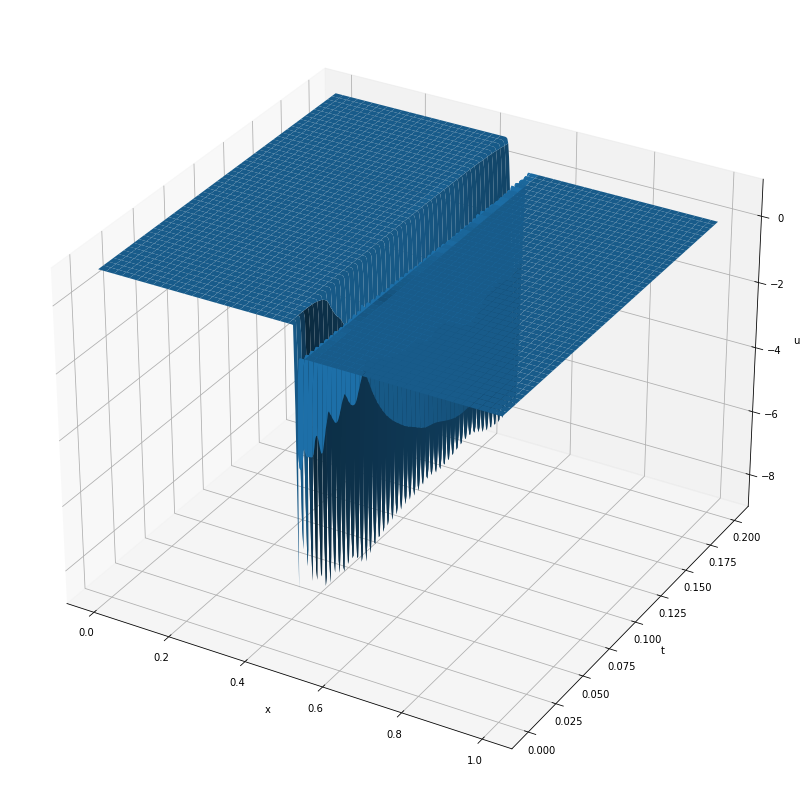

In [12]:
fig = plt.figure()
fig.set_size_inches(19, 11)
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)
ax.plot_surface(X, T, out[:,:,2])
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()